In [14]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications import print_function
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
model = VGG16(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
img_path = 'C:/Python/keras_training/113.jpg'
img = image.load_img(img_path, target_size=(224, 224))

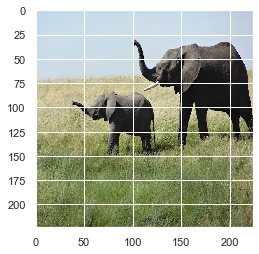

In [17]:
plt.imshow(img)

In [5]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [6]:
preds = model.predict(x)
print('Predicted>', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted> [('n02504458', 'African_elephant', 0.910884), ('n01871265', 'tusker', 0.08458784), ('n02504013', 'Indian_elephant', 0.0044847275)]


In [7]:
np.argmax(preds[0])

386

In [11]:
african_elephant_output = model.output[:,368]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function([model.input],
                    [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value,  conv_layer_output_value = iterate([x])

In [12]:
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

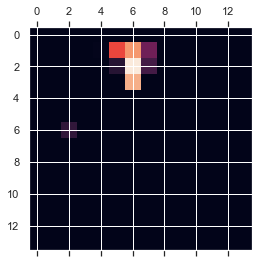

In [16]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap);